# Avocado Project
### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
#### Some relevant columns in the dataset:
•	Date - The date of the observation                                                                          
•	AveragePrice - the average price of a single avocado                                                                         
•	type - conventional or organic                                                                                 
•	year - the year                                                                                                  
•	Region - the city or region of the observation                                                                       
•	Total Volume - Total number of avocados sold                                                                             
•	4046 - Total number of avocados with PLU 4046 sold                                                                           
•	4225 - Total number of avocados with PLU 4225 sold                                                         
•	4770 - Total number of avocados with PLU 4770 sold                                                              

#### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .                                     
Task: One of Classification and other of Regression                                                                       
Do both tasks in the same .ipynb file and submit at single file.                         


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data 
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Our dataset has 18249 rows and 14 columns. For Regression problem, AveragePrice is the target variable and others are features.
For Classification problem, region is the target variable and others are features.

### Exploratory Data Analysis (EDA)

In [3]:
# checking shape
print(df.shape)
print('Dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

(18249, 14)
Dataset has 18249 rows and 14 columns.


In [4]:
# checking data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Dataset has three data types int64, float64 and object. Here data type of Date column is object. we need to change its format from object to datetime.

In [5]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Total null values in dataset -  0


In [6]:
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset.')
else:
    print('No duplicate rows present in the dataset.')    

Duplicate rows = 0
No duplicate rows present in the dataset.


In [7]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('Total unique values in',i,'column -',dataframe[i].nunique())
        print(dataframe[i].value_counts())
        print('_'*50,'\n')    

In [8]:
value_count(df)

Total unique values in Unnamed: 0 column - 53
0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64
__________________________________________________ 

Total unique values in Date column - 169
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64
__________________________________________________ 

Total uniq

In [9]:
# Adding a month column 
df['month'] = pd.to_datetime(df['Date']).dt.month

In [10]:
# dropping irrelevant column
df.drop(columns=['Unnamed: 0','Date'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 1.8+ MB


In [12]:
# Statistical description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [13]:
# checking description of categorical columns
df.describe(include=[object])

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [14]:
# dividing columns in two parts categorical columns and numeriacl columns.
cat_columns = []
num_columns = []
for i in df.columns:
    if df[i].dtypes=="object":
        cat_columns.append(i)
    else:
        num_columns.append(i)
print('categorical columns - ',cat_columns)
print('numerical columns - ',num_columns)

categorical columns -  ['type', 'region']
numerical columns -  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'month']


### Data visualization

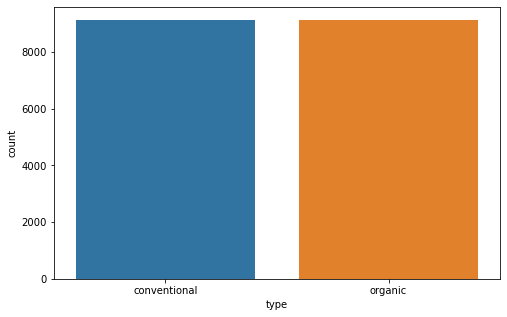

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='type',data=df)
plt.show()

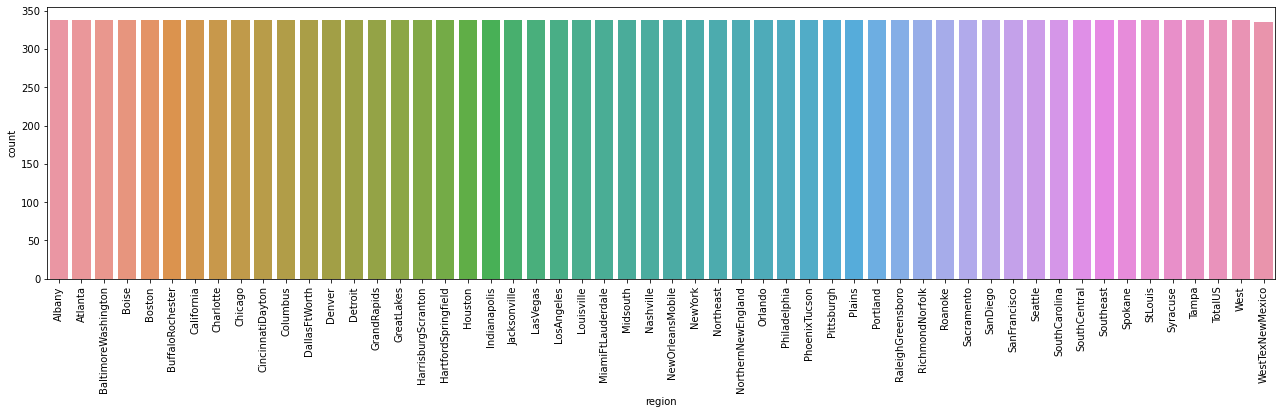

In [16]:
# countplot
plt.figure(figsize=(22,5))
sns.countplot(x='region',data=df)
plt.xticks(rotation=90)
plt.show()

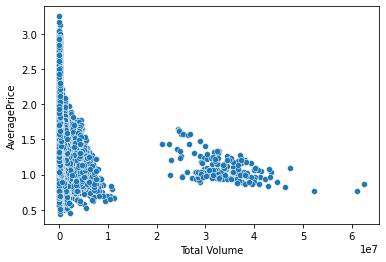

In [17]:
# scatterplot
sns.scatterplot(x='Total Volume',y='AveragePrice',data=df)
plt.show()

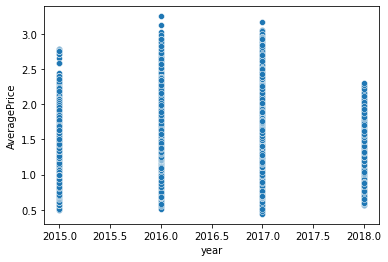

In [18]:
# scatterplot
sns.scatterplot(x='year',y='AveragePrice',data=df)
plt.show()

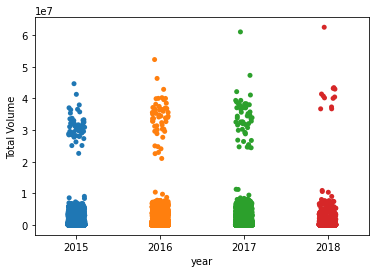

In [19]:
# stripplot
sns.stripplot(x='year',y='Total Volume',data=df)
plt.show()

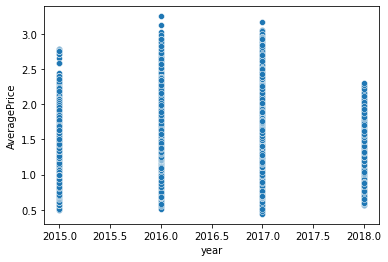

In [20]:
# scatterplot
sns.scatterplot(x='year',y='AveragePrice',data=df)
plt.show()

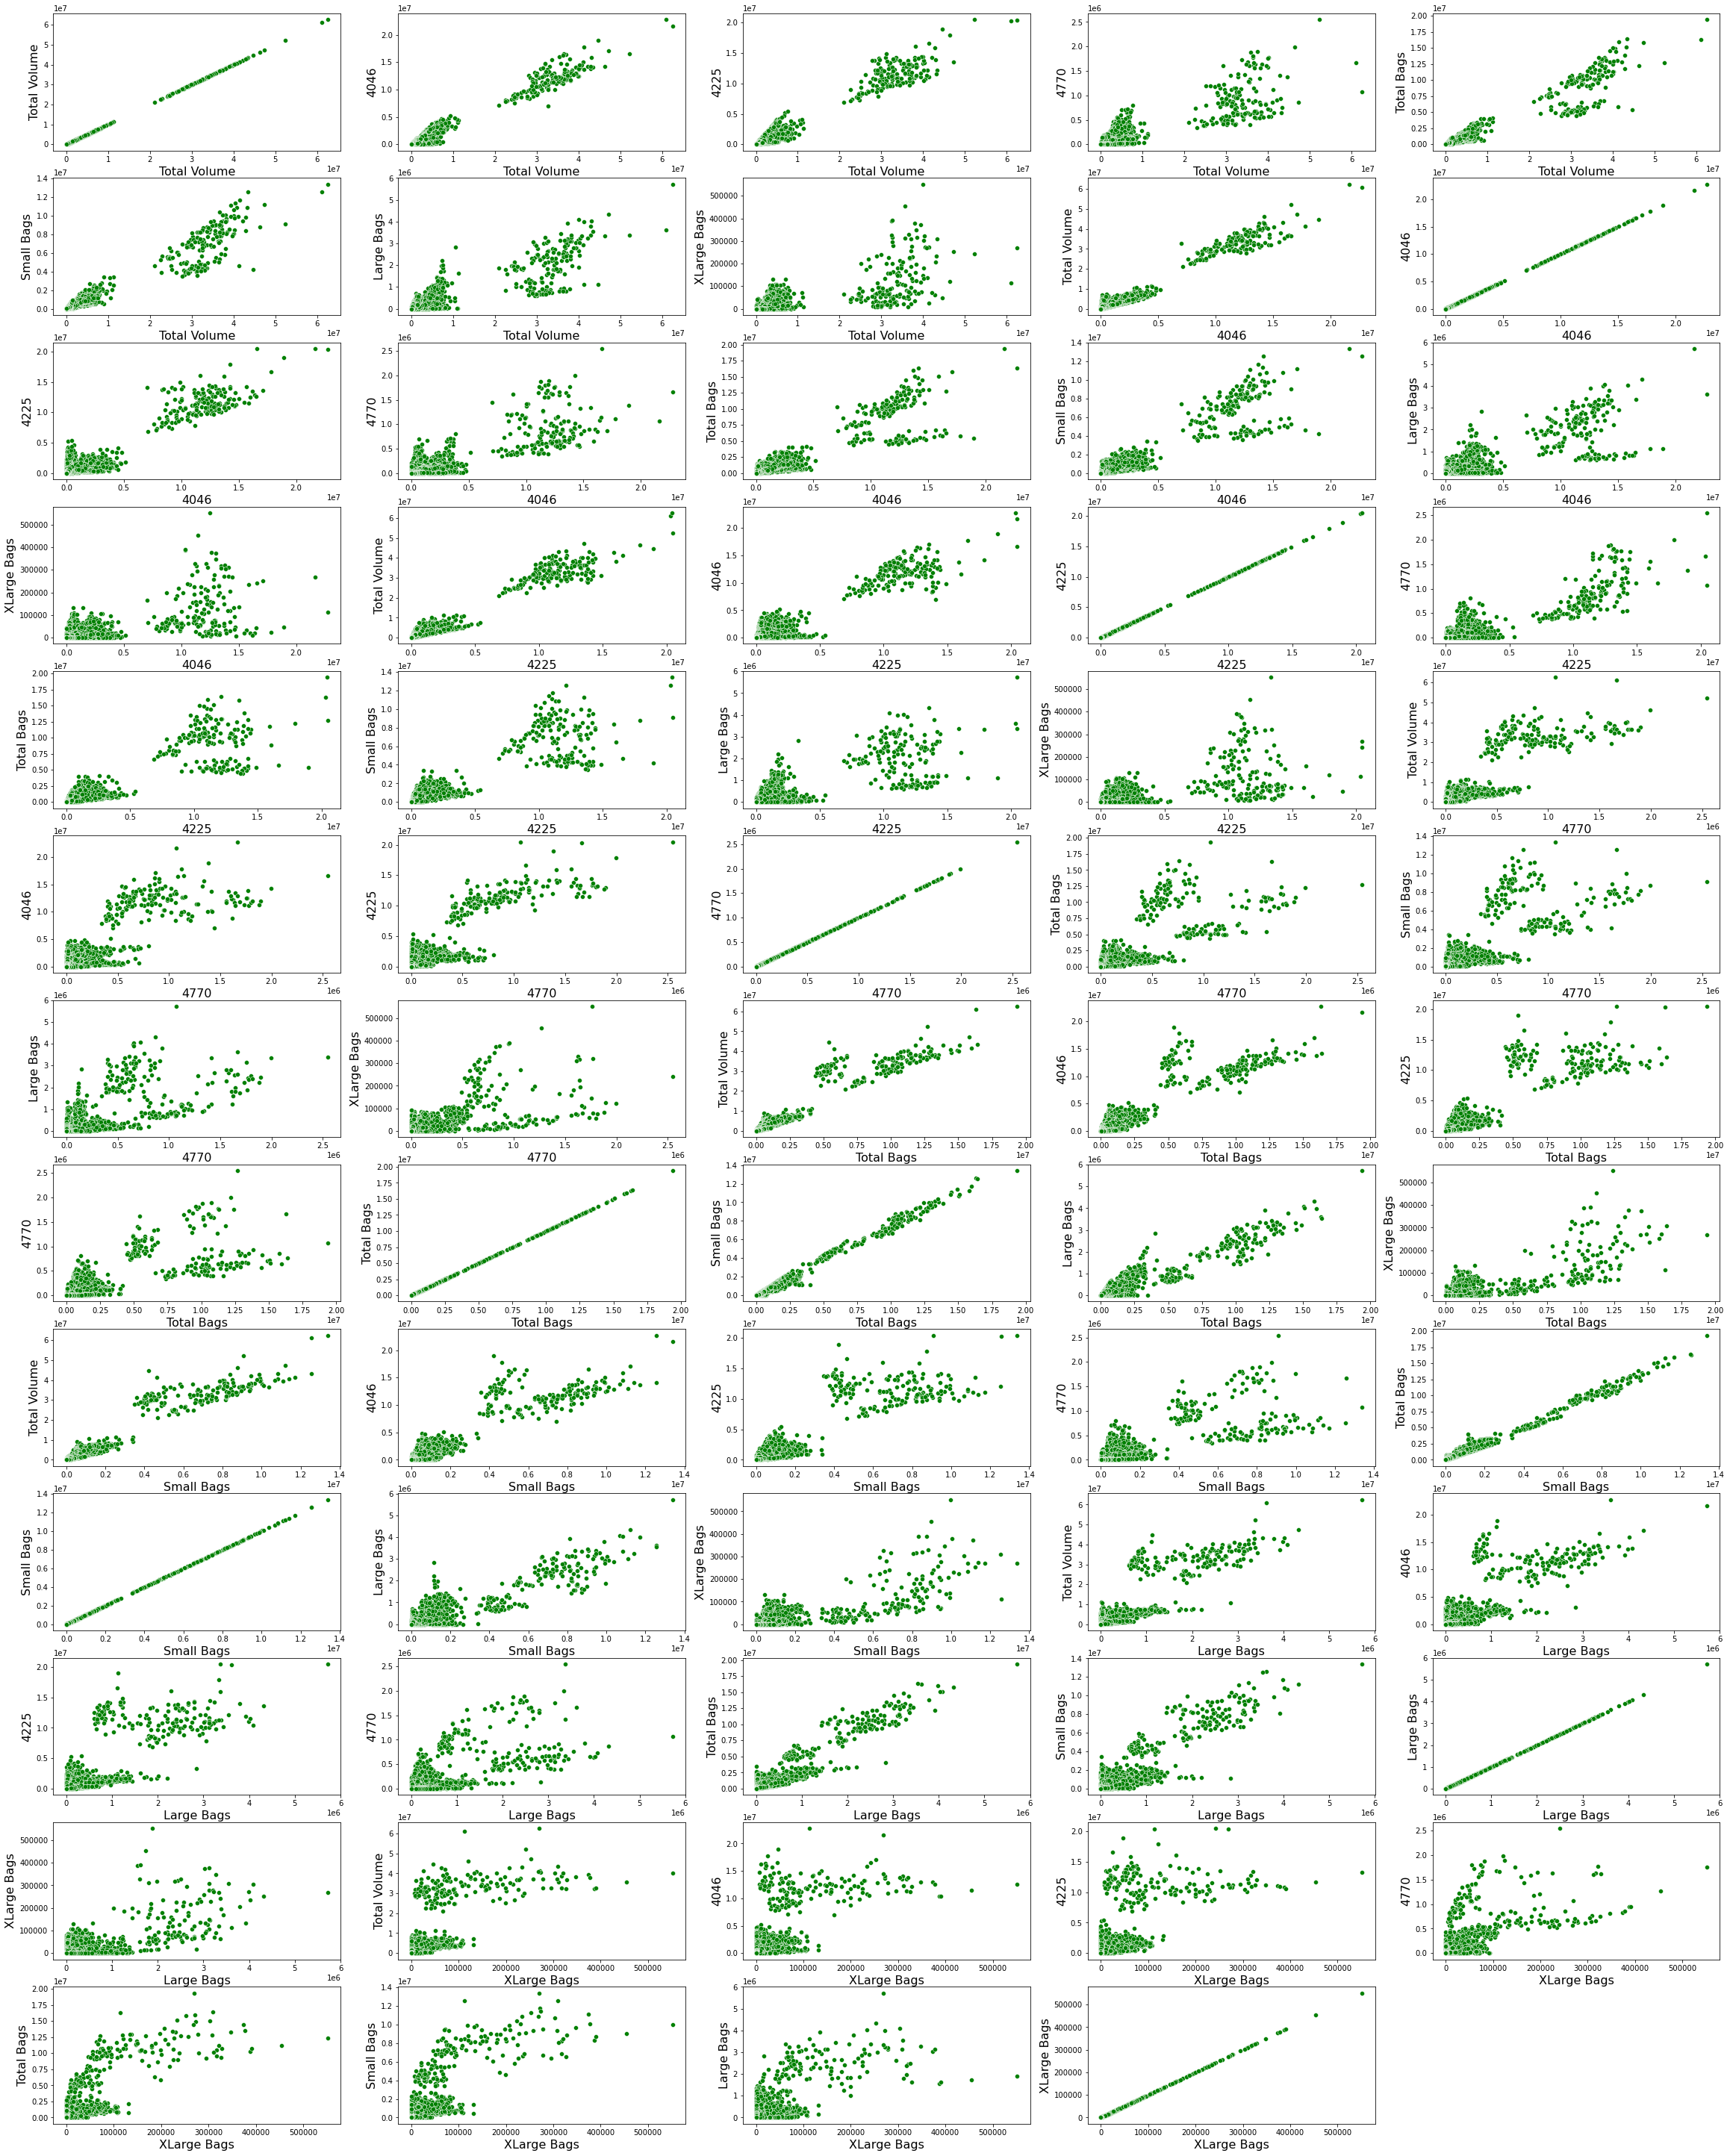

In [21]:
plt.figure(figsize = (40,52), facecolor = 'white')
plotnumber = 1

for i in ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']:
    for j in ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']:
        if plotnumber <= 70:
            ax = plt.subplot(13, 5 , plotnumber)
            sns.scatterplot(df[i],df[j],color='green')
            plt.xlabel(i, fontsize = 16)
            plt.ylabel(j, fontsize=16)
            plotnumber +=1
plt.show()

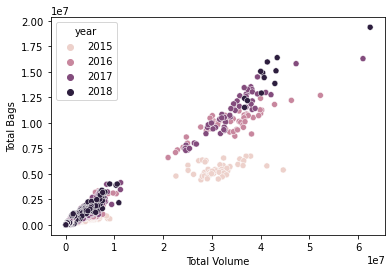

In [22]:
# scatterplot
sns.scatterplot(x='Total Volume',y='Total Bags',hue='year',data=df)
plt.show()

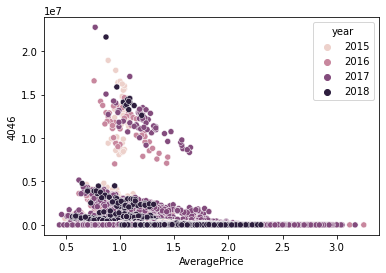

In [23]:
# scatterplot
sns.scatterplot(x='AveragePrice',y='4046',hue='year',data=df)
plt.show()

In [24]:
def plot(name):
    plt.figure(figsize = (20,18), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 50:
            ax = plt.subplot(4, 4 , plotnumber)
            plot_name(df[i],color='pink')
            plt.xlabel(i, fontsize = 16)
            plotnumber +=1
    plt.show()

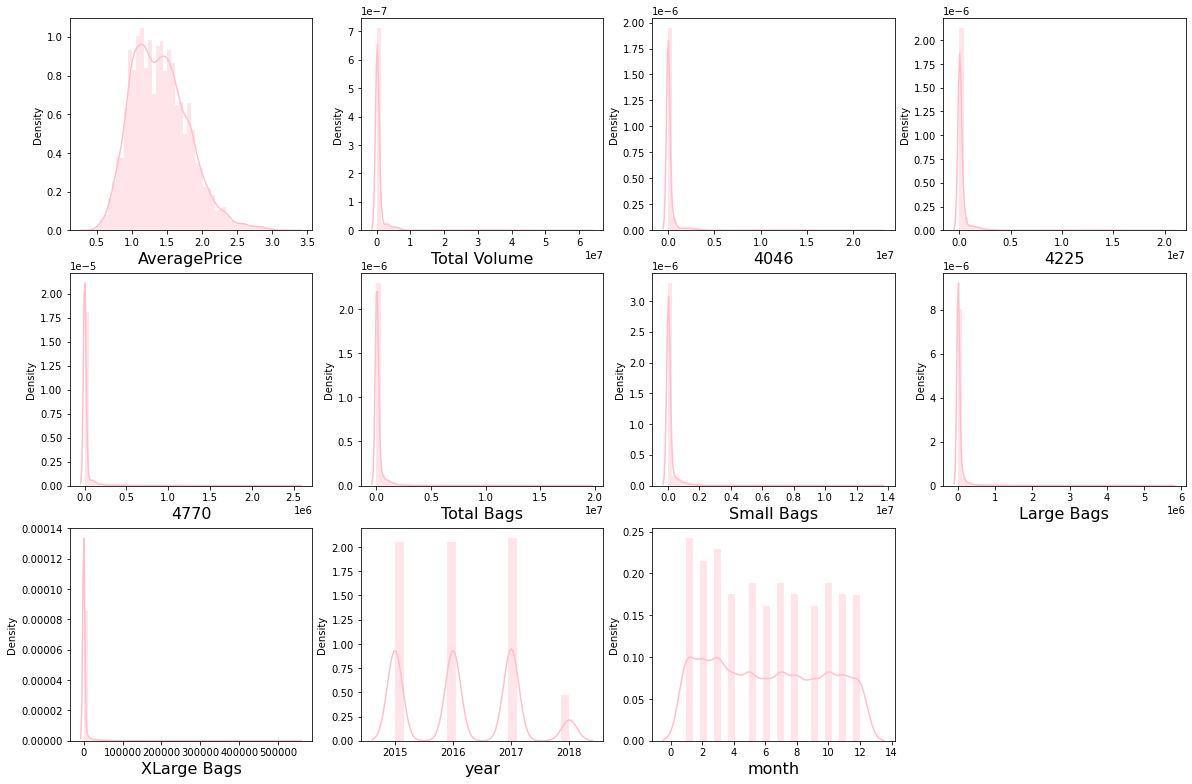

In [25]:
# checking skewness
plot_name= sns.distplot
plot(num_columns)

Columns Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags are highly skewed.

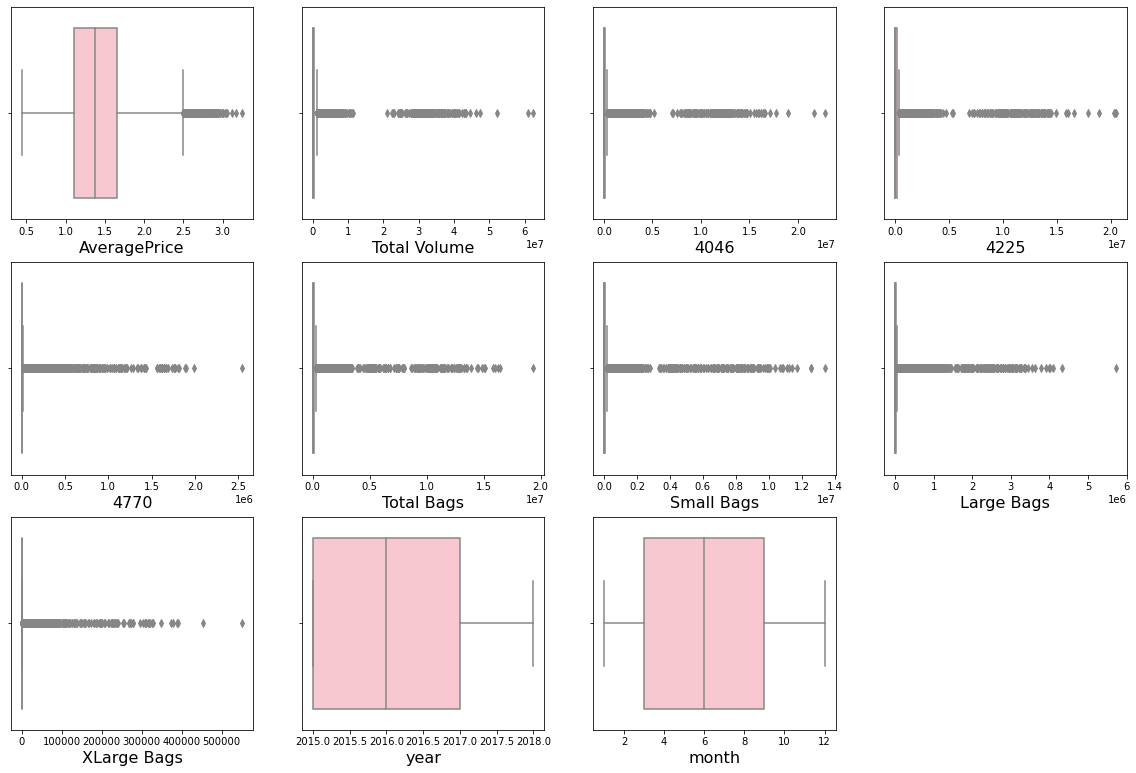

In [26]:
# checking outliers
plot_name= sns.boxplot
plot(num_columns)

Columns AveragePrice,Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags have outliers.

In [27]:
# correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


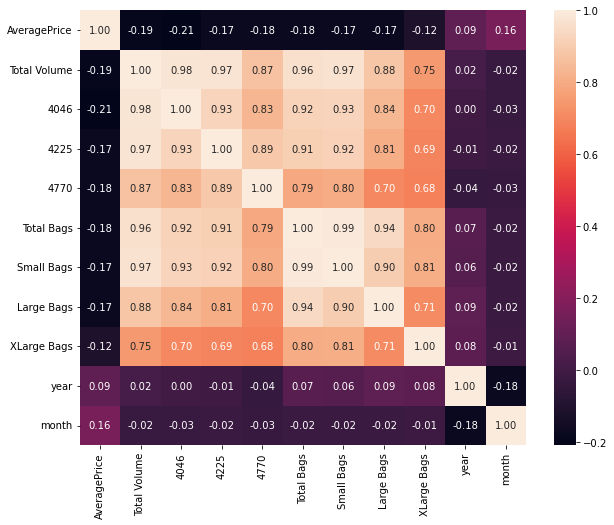

In [28]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

 here we can see that multicollinearity exists in the dataset.                                                                  
 4046,4225,4770,Small Bags,Large Bags and XLarge Bags have strong positive correlation.

####  Regression Problem

In [29]:
# separating target variable and features
x1 = df.drop(columns='AveragePrice')            # features
y1= df['AveragePrice']                          # target variable

In [30]:
# checking skewness
x1.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
month            0.106617
dtype: float64

In [31]:
# separating skewed columns
skew_col = []
non_skew = []
for i in num_columns[1:]:
    if x1[i].skew()>0.5 or x1[i].skew()<(-0.5):
        skew_col.append(i)
    else:
        non_skew.append(i)
print('skewed columns',skew_col,'\nNon skewed column-',non_skew)

skewed columns ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'] 
Non skewed column- ['year', 'month']


In [32]:
# reducing skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x1[skew_col]= pt.fit_transform(x1[skew_col])
x1.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.215339
month           0.106617
dtype: float64

skewness have reduced

In [33]:
# columns having outliers excluding target variable
out_col=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [34]:
# z-score
from scipy.stats import zscore
z = np.abs(zscore(x1[out_col]))

threshold = 3
outliers1 = np.where(z>3)
outliers2 = np.where(z<(-3))
print('Outliers:-\n',outliers1,'\n',outliers2)

out = len(set(outliers1[0])) + len(set(outliers2[0]))
print('\nTotal outliers =',out)

print('\nData loss will be',(out/df.shape[0])*100,'%')

Outliers:-
 (array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11321,
       11322, 11325, 11326, 11332, 11333, 11336, 11338, 11340, 11342,
       11347, 11348, 11349, 11350, 11354, 11387, 11388, 11594, 11595,
       11596, 11597, 11614, 11662, 12132, 14404], dtype=int64), array([2, 5, 

In [35]:
# checking shape before removing outliers
x1.shape

(18249, 12)

In [36]:
# removing outliers
x1=x1[(z<3).all(axis=1)]
y1=y1[(z<3).all(axis=1)]
x1.shape

(18151, 12)

In [37]:
# encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in ['year','region','type']:
    x1[i] = OE.fit_transform(x1[i].values.reshape(-1,1))
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0.0,0.0,0.0,12
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0.0,0.0,0.0,12
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0.0,0.0,0.0,12
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0.0,0.0,0.0,12
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.0,3.0,53.0,2
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.0,3.0,53.0,1
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.0,3.0,53.0,1
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.0,3.0,53.0,1


In [38]:
# features scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x1[['type', 'region','month','year']] = scaler.fit_transform(x1[['type', 'region','month','year']])

In [39]:
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-1.001930,-1.221244,-1.698083,1.644573
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-1.001930,-1.221244,-1.698083,1.644573
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-1.001930,-1.221244,-1.698083,1.644573
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-1.001930,-1.221244,-1.698083,1.644573
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-1.001930,-1.221244,-1.698083,1.361827
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,0.998074,1.972053,1.713092,-1.182889
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,0.998074,1.972053,1.713092,-1.465635
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,0.998074,1.972053,1.713092,-1.465635
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,0.998074,1.972053,1.713092,-1.465635


In [40]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x1.columns
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,vif values
0,Total Volume,52.617372
1,4046,7.249243
2,4225,11.027762
3,4770,4.213772
4,Total Bags,34.520909
5,Small Bags,15.131687
6,Large Bags,3.433727
7,XLarge Bags,2.145273
8,type,3.695095
9,year,1.382524


some columns vif values are greater than 10 means there are multicollinearity exists.

In [41]:
# dropping high vif value column
x1.drop('Total Volume',axis=1,inplace=True)

# again checking vif values
vif = pd.DataFrame()
vif['Features']=x1.columns
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,vif values
0,4046,3.967553
1,4225,4.494069
2,4770,4.195793
3,Total Bags,22.857746
4,Small Bags,15.117878
5,Large Bags,3.365818
6,XLarge Bags,2.126514
7,type,3.441430
8,year,1.379608
9,region,1.090611


still some columns vif values are high.

In [42]:
# dropping high vif value column
x1.drop('Total Bags',axis=1,inplace=True)

# again checking vif values
vif = pd.DataFrame()
vif['Features']=x1.columns
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,vif values
0,4046,3.937062
1,4225,4.330221
2,4770,4.195792
3,Small Bags,4.190701
4,Large Bags,1.969752
5,XLarge Bags,2.125348
6,type,3.432878
7,year,1.347511
8,region,1.090599
9,month,1.051242


Now all vif values are less than 10.

In [43]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [44]:
# creating lists of models
LR = LinearRegression()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor()
ETR = ExtraTreesRegressor()
svr = SVR()

model_list= [LR,RFR,GBR,KNN,ETR,svr,DTR]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30, random_state=79)

In [46]:
# function for model
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    train_pred = name.predict(x_train)
    score_r2 = r2_score(y_test,y_pred)
    train_score = r2_score(y_train,train_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    print('r2 score =',score_r2,'\nr2 score on training data =',train_score,'\nMean absolute error =',MAE,
          '\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)
    
    print('\nCross validation:-\n')
    score_cv = cross_val_score(name,x1,y1,cv=20)
    cv_mean = score_cv.mean()
    diff = (score_r2 - cv_mean)*100
    print('cross validation scores:-',score_cv,'\ncross validation mean score:-',cv_mean,
          '\nDifference between r2 score and cross validation mean score =',diff)

In [47]:
# All models
for i in model_list:
    print('\n__________________ Using',i,'_________________\n')
    model(i)


__________________ Using LinearRegression() _________________

r2 score = 0.5371478056444381 
r2 score on training data = 0.5060214625219386 
Mean absolute error = 0.21310558903111046 
Mean squared error = 0.07549031481047061 
Root mean squared error = 0.2747550087086141

Cross validation:-

cross validation scores:- [-0.51643148 -0.65011107 -1.09348091  0.36572574  0.32985952  0.05934761
  0.2928602  -0.07117685  0.13895312  0.32790034  0.11552518 -0.08124298
  0.18701088  0.08689172  0.18596863  0.24681627  0.22151748  0.17767507
  0.20201769 -0.08069854] 
cross validation mean score:- 0.022246380009267052 
Difference between r2 score and cross validation mean score = 51.490142563517104

__________________ Using RandomForestRegressor() _________________

r2 score = 0.8904763830507361 
r2 score on training data = 0.9837881199777724 
Mean absolute error = 0.0933046088872567 
Mean squared error = 0.017863094144326117 
Root mean squared error = 0.13365288677887252

Cross validation:-

c

Our best model is GradientBoostingRegressor. It has least difference between r2 score and cross validation mean score.

#### Hyperparameter tuning

In [48]:
# parameters for GBR models
param = {'loss':['squared_error','absolute_error','huber','quantile'],
         'n_estimators':[100,150,200],
          }

GSCV= GridSearchCV(estimator=GBR,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [100, 150, 200]})

In [49]:
# finding best parameter value
GSCV.best_params_

{'loss': 'squared_error', 'n_estimators': 200}

In [50]:
# using best parameter value
Model_reg = GradientBoostingRegressor(loss='squared_error',n_estimators=200)

In [51]:
# final model
Model_reg.fit(x_train,y_train)
y_pred=Model_reg.predict(x_test)
score_r2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('r2 score =',score_r2,'\nMean absolute error =',MAE,'\nMean squared error =',MSE,'\nRoot mean squared error =',RMSE)

r2 score = 0.8067580773481606 
Mean absolute error = 0.13307104453274435 
Mean squared error = 0.03151739098024365 
Root mean squared error = 0.17753138026907708


In [52]:
# saving model
import pickle
pickle.dump(Model_reg,open('Avocado regression','wb'))

#### Classification problem

In [53]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [54]:
# separating target variable and features
x2 = df.drop(columns='region')            # features
y2= df['region']                          # target variable

In [55]:
# skewness
x2.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
month            0.106617
dtype: float64

In [56]:
# separating skewed columns
skew_col = []
non_skew = []
for i in num_columns:
    if x2[i].skew()>0.5 or x2[i].skew()<(-0.5):
        skew_col.append(i)
    else:
        non_skew.append(i)
print('skewed columns',skew_col,'\nNon skewed column-',non_skew)

skewed columns ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'] 
Non skewed column- ['year', 'month']


In [57]:
# reducing skewness
x2[skew_col]= pt.fit_transform(x2[skew_col])
x2.skew()

AveragePrice    0.005596
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.215339
month           0.106617
dtype: float64

In [58]:
# columns having outliers
out_col=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [59]:
# checking outliers
# z-score
z = np.abs(zscore(x2[out_col]))

threshold = 3
outliers1 = np.where(z>3)
outliers2 = np.where(z<(-3))
print('Outliers:-\n',outliers1,'\n',outliers2)

out = len(set(outliers1[0])) + len(set(outliers2[0]))
print('\nTotal outliers =',out)

print('\nData loss will be',(out/df.shape[0])*100,'%')

Outliers:-
 (array([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
        5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
        5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
        5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
        8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
        8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
        8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
        8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
        9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
        9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
        9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
       11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
       11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
       11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
       

In [60]:
# removing outliers
x2=x2[(z<3).all(axis=1)]
y2=y2[(z<3).all(axis=1)]
x2.shape

(18141, 12)

In [61]:
# encoding categorical columns
for i in ['year','type']:
    x2[i] = OE.fit_transform(x2[i].values.reshape(-1,1))

In [62]:
# features scaling
x2[['type','month','year']] = scaler.fit_transform(x2[['type','month','year']])

In [63]:
x2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-1.001600,-1.220888,1.644586
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-1.001600,-1.220888,1.644586
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-1.001600,-1.220888,1.644586
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-1.001600,-1.220888,1.644586
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-1.001600,-1.220888,1.361827
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,0.998403,1.972172,-1.183001
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,0.998403,1.972172,-1.465760
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,0.998403,1.972172,-1.465760
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,0.998403,1.972172,-1.465760


In [64]:
# checking variance inflation factor

vif = pd.DataFrame()
vif['Features']=x2.columns
vif['vif values']=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif

,Features,vif values
0,AveragePrice,2.329596
1,Total Volume,53.154472
2,4046,6.866905
3,4225,11.966122
4,4770,4.222939
5,Total Bags,35.397772
6,Small Bags,15.704301
7,Large Bags,3.456791
8,XLarge Bags,2.137584
9,type,4.149780


some columns vif values are greater than 10 means there are multicollinearity exists.

In [65]:
# dropping high vif value column
x2.drop('Total Volume',axis=1,inplace=True)

# again checking vif values
vif = pd.DataFrame()
vif['Features']=x2.columns
vif['vif values']=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif

,Features,vif values
0,AveragePrice,2.285697
1,4046,3.815059
2,4225,4.863482
3,4770,4.208396
4,Total Bags,24.992152
5,Small Bags,15.704246
6,Large Bags,3.375467
7,XLarge Bags,2.121451
8,type,3.970537
9,year,1.528302


still some columns have high vif values.

In [66]:
# dropping high vif value column
x2.drop('Total Bags',axis=1,inplace=True)

# again checking vif values
vif = pd.DataFrame()
vif['Features']=x2.columns
vif['vif values']=[variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif

,Features,vif values
0,AveragePrice,2.096287
1,4046,3.804097
2,4225,4.544514
3,4770,4.206987
4,Small Bags,4.248187
5,Large Bags,2.175386
6,XLarge Bags,2.120780
7,type,3.952584
8,year,1.448381
9,month,1.133374


Now it is better, all vif values are less than 10.

In [67]:
y2

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18141, dtype: object

In [68]:
# replacing values
for i in y2.unique():
    for j in range(54):
        if y2.unique()[j]==i:
            y2 = y2.replace(i,j)
y2.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

#### Models

In [69]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [70]:
# creating lists of models
LgR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
Knn = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

In [71]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.30, random_state=107)

In [72]:
# LogisticRegression model 
LgR.fit(x_train,y_train)
y_pred=LgR.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LgR,x2,y2,cv=20)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.49641741686569907 

confusion matrix:-
 [[63  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  1]
 [ 0  0 55 ...  0  0  2]
 ...
 [ 0  0  0 ... 77  2  0]
 [ 0  0  0 ...  0 95  0]
 [ 0  6  2 ...  0  0  9]] 

classification report:-
               precision    recall  f1-score   support

           0       0.61      0.53      0.57       118
           1       0.22      0.37      0.28       114
           2       0.51      0.60      0.55        92
           3       0.59      0.41      0.49        99
           4       0.44      0.45      0.44        98
           5       0.50      0.42      0.46        92
           6       0.80      0.86      0.83        99
           7       0.56      0.71      0.63        93
           8       0.61      0.77      0.68       100
           9       0.52      0.74      0.61       110
          10       0.51      0.39      0.44        85
          11       0.47      0.56      0.51       109
          12       0.43      0.44      0.43       108
 

In [73]:
# RandomForestClassifier model
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x2,y2,cv=20)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.9221017821054566 

confusion matrix:-
 [[110   0   0 ...   0   0   0]
 [  0  98   0 ...   0   0   0]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   1   4 ...   0   0  89]] 

classification report:-
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       118
           1       0.89      0.86      0.88       114
           2       0.93      0.98      0.95        92
           3       0.98      0.89      0.93        99
           4       0.94      0.92      0.93        98
           5       0.93      0.85      0.89        92
           6       1.00      1.00      1.00        99
           7       0.95      0.96      0.95        93
           8       0.96      0.96      0.96       100
           9       0.91      0.92      0.91       110
          10       0.83      0.91      0.87        85
          11       0.99      0.95      0.97       109
          12       0

In [74]:
# KNeighborsClassifier model
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(Knn,x2,y2,cv=20)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7960683446628697 

confusion matrix:-
 [[101   0   0 ...   0   0   0]
 [  0  82   0 ...   0   0   0]
 [  0   0  88 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 106   0]
 [  0   2   2 ...   0   0  76]] 

classification report:-
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       118
           1       0.61      0.72      0.66       114
           2       0.83      0.96      0.89        92
           3       0.84      0.81      0.82        99
           4       0.89      0.87      0.88        98
           5       0.70      0.80      0.75        92
           6       0.99      0.92      0.95        99
           7       0.74      0.85      0.79        93
           8       0.87      0.91      0.89       100
           9       0.57      0.70      0.63       110
          10       0.60      0.74      0.66        85
          11       0.83      0.90      0.86       109
          12       0

In [75]:
# ExtraTreesclassifier model
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x2,y2,cv=20)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.931655337130259 

confusion matrix:-
 [[113   0   0 ...   0   0   0]
 [  0 103   0 ...   0   0   0]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   0   4 ...   0   0  89]] 

classification report:-
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       118
           1       0.93      0.90      0.92       114
           2       0.94      1.00      0.97        92
           3       0.94      0.91      0.92        99
           4       0.99      0.95      0.97        98
           5       0.94      0.88      0.91        92
           6       1.00      1.00      1.00        99
           7       0.95      0.97      0.96        93
           8       0.97      0.98      0.98       100
           9       0.92      0.92      0.92       110
          10       0.89      0.92      0.90        85
          11       0.96      0.96      0.96       109
          12       0.

In [76]:
# DecisionTreeClassifier model
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(DTC,x2,y2,cv=20)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7940474003307 

confusion matrix:-
 [[ 89   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   4]
 [  0   0  85 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 104   0]
 [  0   1   5 ...   0   0  65]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.75      0.81       118
           1       0.71      0.69      0.70       114
           2       0.86      0.92      0.89        92
           3       0.81      0.81      0.81        99
           4       0.83      0.79      0.81        98
           5       0.76      0.73      0.74        92
           6       0.95      0.94      0.94        99
           7       0.78      0.74      0.76        93
           8       0.94      0.88      0.91       100
           9       0.81      0.82      0.81       110
          10       0.64      0.71      0.67        85
          11       0.91      0.79      0.84       109
          12       0.88

In [77]:
# Support vector Machines model
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(svc,x2,y2,cv=20)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8047032886275951 

confusion matrix:-
 [[109   0   0 ...   0   0   0]
 [  0  70   0 ...   0   0   0]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   0   2 ...   0   0  70]] 

classification report:-
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       118
           1       0.58      0.61      0.60       114
           2       0.94      0.98      0.96        92
           3       0.85      0.74      0.79        99
           4       0.90      0.85      0.87        98
           5       0.87      0.73      0.79        92
           6       0.97      0.95      0.96        99
           7       0.87      0.76      0.81        93
           8       0.92      0.96      0.94       100
           9       0.66      0.84      0.74       110
          10       0.56      0.75      0.64        85
          11       0.85      0.91      0.88       109
          12       0

The accuracy score of Logistic regression model is 49.6% and difference between accuracy score and cross validation mean score is 3.4%. The accuracy score of support vector machines is 80.4% and difference between accuracy score and cross validation mean score is 6.8%.

#### Hyperparameter tuning

In [78]:
# parameter for Support vector machines
param = {'gamma':['scale','auto'],
         'random_state':[69,137,195]
        }

GSCV= GridSearchCV(estimator=svc,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'random_state': [69, 137, 195]})

In [79]:
# finding best parameter value
GSCV.best_params_

{'gamma': 'scale', 'random_state': 69}

In [80]:
Model_clf = SVC(gamma='scale', random_state= 69)

In [81]:
# final model
Model_clf.fit(x_train,y_train)
y_pred=Model_clf.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.8047032886275951 

confusion matrix:-
 [[109   0   0 ...   0   0   0]
 [  0  70   0 ...   0   0   0]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   0   2 ...   0   0  70]] 

classification report:-
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       118
           1       0.58      0.61      0.60       114
           2       0.94      0.98      0.96        92
           3       0.85      0.74      0.79        99
           4       0.90      0.85      0.87        98
           5       0.87      0.73      0.79        92
           6       0.97      0.95      0.96        99
           7       0.87      0.76      0.81        93
           8       0.92      0.96      0.94       100
           9       0.66      0.84      0.74       110
          10       0.56      0.75      0.64        85
          11       0.85      0.91      0.88       109
          12       0

In [82]:
# saving model
import pickle
pickle.dump(Model_clf,open('Avocado classification','wb'))